# Install Library

In [1]:
pip install matplotlib numpy opencv-python pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load gambar

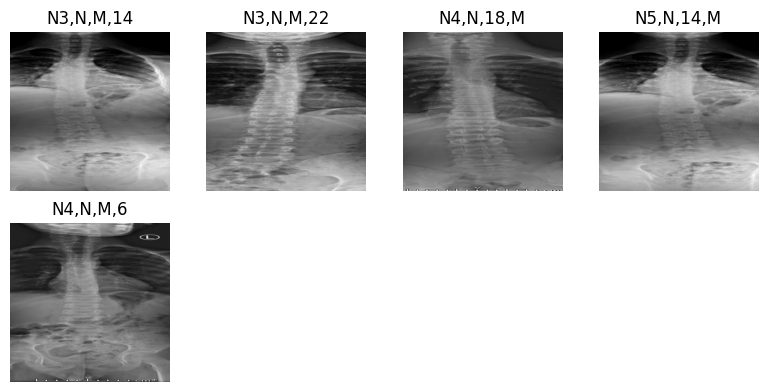

In [6]:
img1 = cv2.imread('Assets/N3,N,M,14_1_0.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Assets/N3,N,M,22_1_0.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('Assets/N4,N,18,M_1_0.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('Assets/N5,N,14,M_1_0.jpg', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('Assets/N4,N,M,6_1_0.jpg', cv2.IMREAD_GRAYSCALE)

images = [img1, img2, img3, img4, img5]
titles = ['N3,N,M,14', 'N3,N,M,22', 'N4,N,18,M', 'N5,N,14,M', 'N4,N,M,6']

def show_all(images, titles, cmap='gray'):
    plt.figure(figsize=(8, 4))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 4, i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_all(images, titles, cmap='gray')

# Crob dan resize

# Ekualisasi

In [4]:
def histogram_equalization(img):
    hist = np.zeros(256, dtype=int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i, j]] += 1
    cdf = hist.cumsum()
    cdf_normalized = ((cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())).astype(np.uint8)
    equalized = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            equalized[i, j] = cdf_normalized[img[i, j]]
    return equalized

# Median Filter

In [3]:
def median_filter(image, ksize):
    pad = ksize // 2
    padded = np.pad(image, pad, mode='edge')
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+ksize, j:j+ksize]
            median_val = np.median(window)
            output[i, j] = median_val
    return output

# Moprh

In [7]:
def dilation(img):
    dilated = np.zeros_like(img)
    padded = np.pad(img, 1, mode='constant')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighborhood = padded[i:i+3, j:j+3]
            dilated[i, j] = np.max(neighborhood)
    return dilated

Output

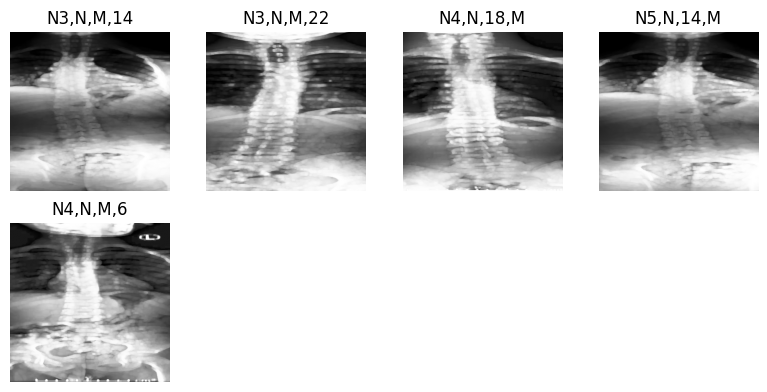

In [8]:
img1_done = dilation(median_filter(histogram_equalization(img1), 3))
img2_done = dilation(median_filter(histogram_equalization(img2), 3))
img3_done = dilation(median_filter(histogram_equalization(img3), 3))
img4_done = dilation(median_filter(histogram_equalization(img4), 3))
img5_done = dilation(median_filter(histogram_equalization(img5), 3))

images_done = [img1_done, img2_done, img3_done, img4_done, img5_done]
titles_done = ['N3,N,M,14', 'N3,N,M,22', 'N4,N,18,M', 'N5,N,14,M', 'N4,N,M,6']

show_all(images_done, titles_done, cmap='gray')